In [1]:
import pandas as pd
import numpy as np  
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
gdp_df = pd.read_csv('../data/gdp_per_capita.csv', skipfooter=2, engine = 'python')#skipfooter fixed the erroneous rows at the end of the dataset
gdp_df.head(10)

,Country or Area,Year,Value,Value Footnotes
0,Afghanistan,2019,2065.036398,NaN
1,Afghanistan,2018,2033.779002,NaN
2,Afghanistan,2017,2058.383832,NaN
3,Afghanistan,2016,2057.062164,NaN
4,Afghanistan,2015,2068.265904,NaN
5,Afghanistan,2014,2102.385234,NaN
6,Afghanistan,2013,2116.465454,NaN
7,Afghanistan,2012,2075.491747,NaN
8,Afghanistan,2011,1904.559799,NaN
9,Afghanistan,2010,1957.029338,NaN


5. Added skipfooter = 2 to avoid the last two rows of the dataframe which had some footer data pertaining to the data exluded for South Sudan

In [3]:
gdp_df[-5:]

,Country or Area,Year,Value,Value Footnotes
6863,Zimbabwe,1994,3263.934978,NaN
6864,Zimbabwe,1993,3033.504852,NaN
6865,Zimbabwe,1992,3054.889178,NaN
6866,Zimbabwe,1991,3426.598094,NaN
6867,Zimbabwe,1990,3324.348171,NaN


In [4]:
gdp_df = (gdp_df
          .drop(columns = "Value Footnotes")
          .rename(columns={"Country or Area": "Country", "Value": "GDP_per_Capita"}))
                
gdp_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6868 entries, 0 to 6867
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Country         6868 non-null   object 
 1   Year            6868 non-null   int64  
 2   GDP_per_Capita  6868 non-null   float64
dtypes: float64(1), int64(1), object(1)
memory usage: 161.1+ KB


## 7. Rows = 3, Columns 6868

Country is an object, Year is a interger, GDP_per_Capita is a float

In [5]:
print(gdp_df["Year"].min())

print(gdp_df["Year"].max())

1990
2019


## 8. Years 1990-2019 are represented

In [6]:
gdp_df["Year"].value_counts(sort = True)

2013    238
2014    238
2016    238
2015    238
2017    238
2012    237
2018    237
2011    237
2009    236
2010    236
2007    235
2008    235
2006    235
2004    234
2005    234
2002    233
2003    233
2001    232
2019    231
2000    231
1999    224
1998    223
1997    223
1996    221
1995    221
1994    214
1993    212
1992    209
1991    208
1990    207
Name: Year, dtype: int64

8. the number of observations increases from 1990 with 207 observations  until 2017 with 238. 2018 and 2019 decreased slightly with 237 and 231 observations, respectively. 

In [7]:
countries_of_gdp_df = gdp_df.drop_duplicates(subset="Country")
print(countries_of_gdp_df)

                  Country  Year  GDP_per_Capita
0             Afghanistan  2019     2065.036398
18                Albania  2019    13724.058790
48                Algeria  2019    11510.557088
78                 Angola  2019     6670.332297
108   Antigua and Barbuda  2019    21910.184985
...                   ...   ...             ...
6722              Vietnam  2019     8041.178551
6752   West Bank and Gaza  2019     6219.960291
6778                World  2019    16911.193295
6808               Zambia  2019     3470.448801
6838             Zimbabwe  2019     2835.948532

[238 rows x 3 columns]


## 9. 238 Countries are in the data set. Djibouti is represented the least. Several countries have 30 observations which is the most observations. They have fewer observations because they didn't report their GDP to the UN possibly.  

In [8]:
gdp_df["Country"].value_counts(sort = True)

Niger                        30
Sweden                       30
United Arab Emirates         30
Costa Rica                   30
Lower middle income          30
                             ..
Nauru                        16
Cayman Islands               13
Sint Maarten (Dutch part)    10
Turks and Caicos Islands      9
Djibouti                      7
Name: Country, Length: 238, dtype: int64

In [9]:
gdp_2014 = gdp_df.loc[gdp_df['Year'] == 2014]

In [10]:
gdp_2014.describe()

,Year,GDP_per_Capita
count,238.0,238.000000
mean,2014.0,19766.710348
std,0.0,20983.869623
min,2014.0,822.610458
25%,2014.0,4753.110934
50%,2014.0,12209.385755
75%,2014.0,26803.610474
max,2014.0,156514.133850


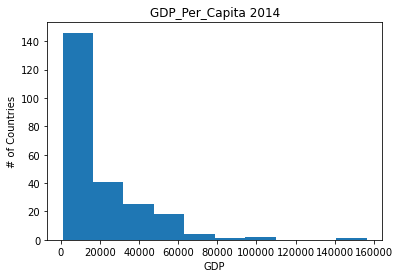

In [11]:
plt.hist(gdp_2014["GDP_per_Capita"], bins = 10)
plt.title("GDP_Per_Capita 2014")
plt.xlabel("GDP")
plt.ylabel("# of Countries")
plt.show;

## 12. Histogram description: Right skewed unimodal. 

In [12]:
countries_of_gdp_2014_srt = (gdp_2014
                             .drop_duplicates(subset="Country")
                             .sort_values("GDP_per_Capita"))
print(countries_of_gdp_2014_srt)

                       Country  Year  GDP_per_Capita
1047  Central African Republic  2014      822.610458
827                    Burundi  2014      886.235777
3781                    Malawi  2014     1027.208496
1422           Dem. Rep. Congo  2014     1029.790785
4528                     Niger  2014     1127.615541
...                        ...   ...             ...
561                    Bermuda  2014    77361.104881
5464                 Singapore  2014    87808.663157
5138                     Qatar  2014    95578.416973
3691                Luxembourg  2014   108760.916030
3721          Macao SAR, China  2014   156514.133850

[238 rows x 3 columns]


## 13. 

Top 5: Macao, Luxumbourg, Qatar, Singapore, Bermuda

Bottom 5: Central African Republic, Burundi, Malawi, Dem Rep Congo, Niger.

In [13]:
gdp_pivoted = pd.pivot_table(gdp_df, 
                             values = "GDP_per_Capita" , 
                             columns = "Year", 
                             index = "Country")

In [14]:
gdp_pivoted = gdp_pivoted[[1990,2017]]

In [15]:
gdp_pivoted = gdp_pivoted.dropna()

In [16]:
gdp_pivoted["Percent_Change"] = 100*(gdp_pivoted[2017]-gdp_pivoted[1990])/gdp_pivoted[2017]

In [17]:
gdp_pivoted_srt = gdp_pivoted.sort_values("Percent_Change")
gdp_pivoted_srt[gdp_pivoted_srt["Percent_Change"] < 0].value_counts().sum()

17

## 16. 17 countries experience a negative GDP perc change

In [18]:
gdp_pivoted.sort_values("Percent_Change", ascending = False)

Year,1990,2017,Percent_Change
Country,,,
Equatorial Guinea,1039.985049,22551.083246,95.388314
China,1423.896348,14344.421239,90.073518
Myanmar,619.645144,4739.910118,86.927070
East Asia & Pacific (excluding high income),2173.223895,12986.322227,83.265286
East Asia & Pacific (IDA & IBRD),2196.950288,13123.151792,83.258974
...,...,...,...
Central African Republic,1201.677234,912.802052,-31.647078
Ukraine,15751.722440,11871.123624,-32.689398
Burundi,1184.842440,773.571858,-53.165143


## 17. Equatorial Guinea had the highest perc change in GDP. China had the second highest

In [19]:
gdp_guinea = gdp_df[gdp_df["Country"].isin(['Equatorial Guinea'])]
gdp_china = gdp_df[gdp_df["Country"].isin(['China'])]

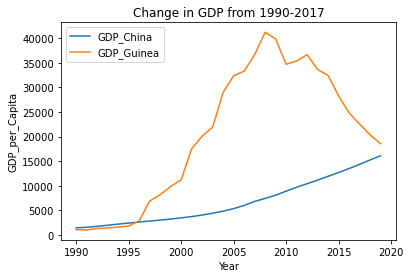

In [20]:
plt.plot(gdp_china["Year"], 
         gdp_china["GDP_per_Capita"])
plt.plot(gdp_guinea["Year"],
        gdp_guinea["GDP_per_Capita"]);
plt.xlabel("Year")
plt.ylabel("GDP_per_Capita")
plt.title("Change in GDP from 1990-2017")
plt.legend(["GDP_China", "GDP_Guinea"]);

## 17.b the GDP_per_Capita of China has a steady increase from 1990 to 2019, while Guinea had a drastic increase around 1996 but the started declining around 2007 and is now approximately equal to the GDP_per_Capita of China. 

In [21]:
continents = pd.read_csv('../data/continents.csv')

In [22]:
gdp_df = pd.merge(left = continents,
                 right = gdp_df,
                 on = 'Country');
gdp_df.head()

,Continent,Country,Year,GDP_per_Capita
0,Asia,Afghanistan,2019,2065.036398
1,Asia,Afghanistan,2018,2033.779002
2,Asia,Afghanistan,2017,2058.383832
3,Asia,Afghanistan,2016,2057.062164
4,Asia,Afghanistan,2015,2068.265904


In [23]:
gdp_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5443 entries, 0 to 5442
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Continent       5443 non-null   object 
 1   Country         5443 non-null   object 
 2   Year            5443 non-null   int64  
 3   GDP_per_Capita  5443 non-null   float64
dtypes: float64(1), int64(1), object(2)
memory usage: 212.6+ KB


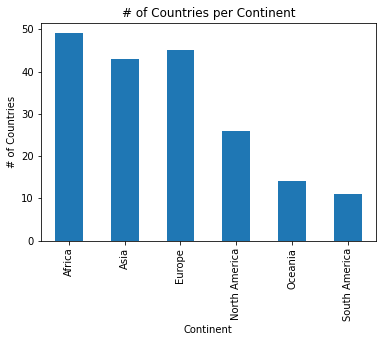

In [24]:
gdp_df.groupby("Continent")["Country"].nunique().plot(kind = 'bar')#nunique resolved the issue of their being multiple instances of each country on this graph
plt.title("# of Countries per Continent")
plt.ylabel("# of Countries");

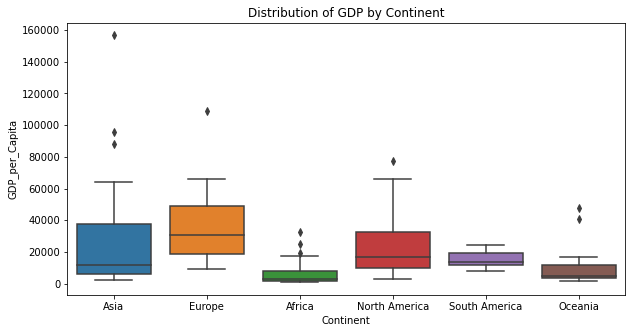

In [25]:
plt.figure(figsize = (10,5))
sns.boxplot(data = gdp_df.loc[gdp_df['Year'] == 2014], #loc for pulling out just the year 2014
            x = 'Continent',
            y = 'GDP_per_Capita')
plt.title("Distribution of GDP by Continent");

## 21. Africa has the largest number of countries, but the smallest GDP_per_Capita by the median. Europe has the highest median GDP_per_Capita. The range of GDP_per_Capita in Asia is the largest.

In [26]:
internet_df = pd.read_csv('../data/internet_use.csv', nrows = 4500)

In [27]:
internet_df.head(-5)

,Country or Area,Year,Value,Value Footnotes
0,Afghanistan,2014,6.390000,NaN
1,Afghanistan,2013,5.900000,NaN
2,Afghanistan,2012,5.454545,NaN
3,Afghanistan,2011,5.000000,NaN
4,Afghanistan,2010,4.000000,NaN
...,...,...,...,...
4490,Zimbabwe,1997,0.033080,NaN
4491,Zimbabwe,1996,0.016790,NaN
4492,Zimbabwe,1995,0.007684,NaN
4493,Zimbabwe,1994,0.001739,NaN


In [28]:
internet_df = (internet_df
               .drop(columns = 'Value Footnotes')
               .rename(columns={"Country or Area": "Country", "Value": "Internet_Users_Pct"})
              .dropna())

In [29]:
internet_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4495 entries, 0 to 4494
Data columns (total 3 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Country             4495 non-null   object 
 1   Year                4495 non-null   object 
 2   Internet_Users_Pct  4495 non-null   float64
dtypes: float64(1), object(2)
memory usage: 140.5+ KB


In [30]:
internet_df["Year"] = pd.to_numeric(internet_df["Year"]) # Year was an object which was making my graphs have the years in descending order

In [31]:
internet_df[internet_df["Internet_Users_Pct"] > 0].sort_values("Year") 

,Country,Year,Internet_Users_Pct
2048,Italy,1990,0.017545
1107,Denmark,1990,0.097277
375,Belgium,1990,0.001007
1388,Finland,1990,0.401088
4301,United States,1990,0.784729
...,...,...,...
2175,Kiribati,2014,12.250000
848,Colombia,2014,52.570000
1299,Ethiopia,2014,2.900000
623,Burundi,2014,1.380000


In [32]:
internet_df_mean = internet_df.groupby('Year')['Internet_Users_Pct'].mean() 
#Thank you Chris Mulvey for the groupby and .mean. helped clean up the graph a lot.

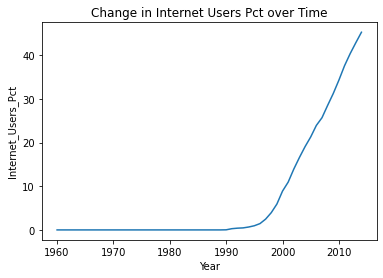

In [33]:
internet_df_mean.plot(kind = 'line',
                      x='Year',
                      y='Internet_Users_Pct')
plt.ylabel("Internet_Users_Pct")
plt.title("Change in Internet Users Pct over Time");

## 25. 1990 is the first year with a non-zero internet_users_pct

In [34]:
gdp_and_internet_use = pd.merge(left = internet_df,
                 right = gdp_df,
                 on = ('Country','Year'));
gdp_and_internet_use.head(5)

,Country,Year,Internet_Users_Pct,Continent,GDP_per_Capita
0,Afghanistan,2014,6.390000,Asia,2102.385234
1,Afghanistan,2013,5.900000,Asia,2116.465454
2,Afghanistan,2012,5.454545,Asia,2075.491747
3,Afghanistan,2011,5.000000,Asia,1904.559799
4,Afghanistan,2010,4.000000,Asia,1957.029338


In [35]:
gdp_and_internet_use.head(-5)

,Country,Year,Internet_Users_Pct,Continent,GDP_per_Capita
0,Afghanistan,2014,6.390000,Asia,2102.385234
1,Afghanistan,2013,5.900000,Asia,2116.465454
2,Afghanistan,2012,5.454545,Asia,2075.491747
3,Afghanistan,2011,5.000000,Asia,1904.559799
4,Afghanistan,2010,4.000000,Asia,1957.029338
...,...,...,...,...,...
3448,Zimbabwe,2002,3.994356,Africa,3190.506481
3449,Zimbabwe,2001,0.799846,Africa,3510.893992
3450,Zimbabwe,2000,0.401434,Africa,3473.429801
3451,Zimbabwe,1999,0.161676,Africa,3600.849291


In [36]:
gdp_and_internet_use_2014 = gdp_and_internet_use.loc[gdp_and_internet_use['Year'] == 2014]
gdp_and_internet_use_2014.head()

,Country,Year,Internet_Users_Pct,Continent,GDP_per_Capita
0,Afghanistan,2014,6.39,Asia,2102.385234
13,Albania,2014,60.10,Europe,11623.866679
34,Algeria,2014,18.09,Africa,11512.705405
56,Angola,2014,21.26,Africa,8239.828837
76,Antigua and Barbuda,2014,64.00,North America,18104.241470


In [37]:
gdp_and_internet_use_2014[gdp_and_internet_use_2014["Internet_Users_Pct"] > 90].value_counts().sum()

13

## 28. 13 countries have an internet users pct over 90%

In [38]:
gdp_and_internet_use_2014_srt = gdp_and_internet_use_2014.sort_values("GDP_per_Capita", ascending = False)
gdp_and_internet_use_2014_srt.head(3)

,Country,Year,Internet_Users_Pct,Continent,GDP_per_Capita
1798,Luxembourg,2014,94.67,Europe,108760.916030
2542,Qatar,2014,91.49,Asia,95578.416973
2751,Singapore,2014,82.00,Asia,87808.663157


In [39]:
top_3 = gdp_and_internet_use[gdp_and_internet_use["Country"].isin(['Luxembourg', 'Qatar', 'Singapore'])]
top_3.head()

,Country,Year,Internet_Users_Pct,Continent,GDP_per_Capita
1798,Luxembourg,2014,94.670000,Europe,108760.916030
1799,Luxembourg,2013,93.776500,Europe,106767.275005
1800,Luxembourg,2012,91.949924,Europe,105411.464571
1801,Luxembourg,2011,90.029859,Europe,108355.582583
1802,Luxembourg,2010,90.620000,Europe,108047.346867


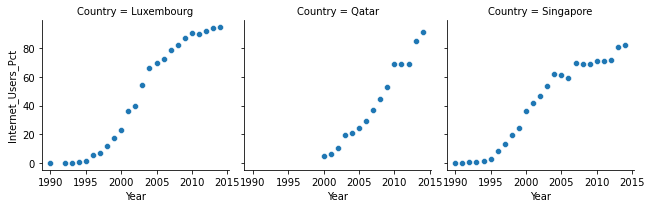

In [40]:
facetgrid = sns.FacetGrid(top_3,col='Country') #initializes the grid and selects which column to use 
facetgrid.map(sns.scatterplot, "Year", "Internet_Users_Pct",); #adds the selected data into the facetgrid

## 29. The 3 countries with the largest GDP_per_Capita also have similar adoption rates for internet use. Qatar is shifted slightly to the right indicating they started adopting the internet at a later time, but they did rapidly adopt it, reaching 90% in about 15 years.

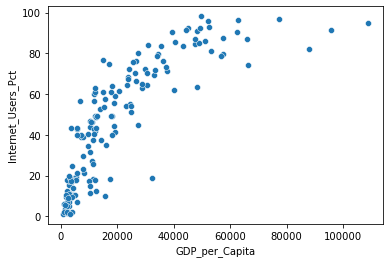

In [41]:
sns.scatterplot(data = gdp_and_internet_use_2014, y = "Internet_Users_Pct", x = "GDP_per_Capita");

## 30. GDP_per_Capita is a strong predictor for percentage of internet users. The higher the GDP_per_Capita the higher the internet_user_Pct. The relationship is not exactly linear. It shoots up rapidly at low GDP, but plateaus around 60K GDP with little change in internet user per after 60K. 

In [42]:
gdp_and_internet_use_2014.corr()

,Year,Internet_Users_Pct,GDP_per_Capita
Year,NaN,NaN,NaN
Internet_Users_Pct,NaN,1.000000,0.824627
GDP_per_Capita,NaN,0.824627,1.000000


## 31. A correlation coefficient of 0.82 is a strong positive correlation between GDP_per_Capita and Internet_User_Pct

In [43]:
gdp_and_internet_use_2014['Log_GDP_per_Capita'] = np.log(gdp_and_internet_use_2014["GDP_per_Capita"])

<ipython-input-43-0dc2a3dc80a4>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  gdp_and_internet_use_2014['Log_GDP_per_Capita'] = np.log(gdp_and_internet_use_2014["GDP_per_Capita"])


In [44]:
gdp_and_internet_use_2014

,Country,Year,Internet_Users_Pct,Continent,GDP_per_Capita,Log_GDP_per_Capita
0,Afghanistan,2014,6.39,Asia,2102.385234,7.650828
13,Albania,2014,60.10,Europe,11623.866679,9.360816
34,Algeria,2014,18.09,Africa,11512.705405,9.351207
56,Angola,2014,21.26,Africa,8239.828837,9.016735
76,Antigua and Barbuda,2014,64.00,North America,18104.241470,9.803902
...,...,...,...,...,...,...
3351,Uruguay,2014,61.46,South America,20582.168953,9.932180
3373,Uzbekistan,2014,43.55,Asia,5764.492705,8.659472
3394,Vanuatu,2014,18.80,Oceania,3116.077025,8.044330
3414,Zambia,2014,17.34,Africa,3450.046561,8.146143


In [45]:
gdp_and_internet_use_2014.corr()

,Year,Internet_Users_Pct,GDP_per_Capita,Log_GDP_per_Capita
Year,NaN,NaN,NaN,NaN
Internet_Users_Pct,NaN,1.000000,0.824627,0.903987
GDP_per_Capita,NaN,0.824627,1.000000,0.864009
Log_GDP_per_Capita,NaN,0.903987,0.864009,1.000000


## 32. The correlation coefficient is higher for Log_GDP_per_Capita than it is for the untransformed GDP_per_Capita. If we replot the scatter plot with Log_GDP_per_Capita, we can see that the points fall more along a straight line instead of rapidly increasing and plateauing. 

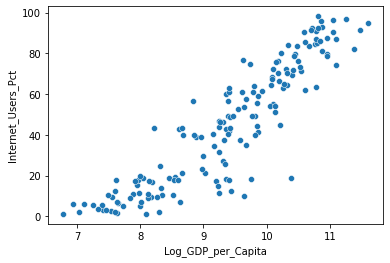

In [46]:
sns.scatterplot(data = gdp_and_internet_use_2014, y = "Internet_Users_Pct", x = "Log_GDP_per_Capita");

In [47]:
USA = gdp_and_internet_use[gdp_and_internet_use["Country"].isin(['United States'])]

In [48]:
USA.corr()

,Year,Internet_Users_Pct,GDP_per_Capita
Year,1.000000,0.969113,0.96344
Internet_Users_Pct,0.969113,1.000000,0.99166
GDP_per_Capita,0.963440,0.991660,1.00000


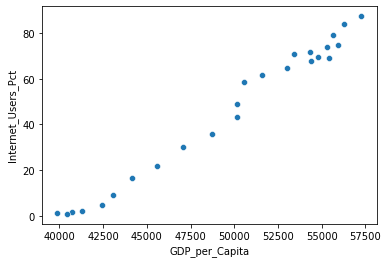

In [49]:
sns.scatterplot(data = USA, y = "Internet_Users_Pct", x = "GDP_per_Capita");

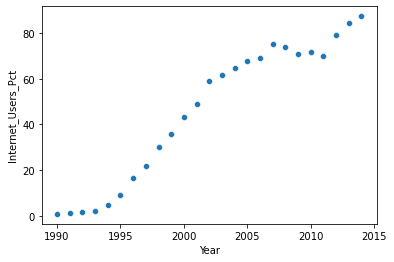

In [50]:
sns.scatterplot(data = USA, y = "Internet_Users_Pct", x = "Year");

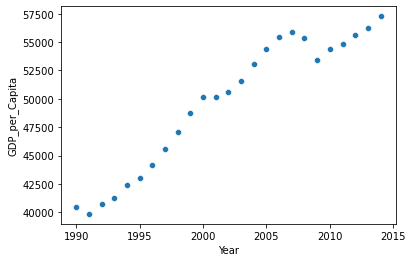

In [51]:
sns.scatterplot(data = USA, y = "GDP_per_Capita", x = "Year");

## 33. There is a strong positive correlation between GDP_per_Capita and Internet_Users_Pct for the USA. However there is almost an equally positive correlation between Internet_Users_Pct and year. It's hard to see if GDP is a good predictor for internet use or if the passage of the years since the internet was invented is a stronger predictor for the USA. 

# Solo Exploration

In [52]:
HIV_knowledge = pd.read_csv('../data/Knowledge of HIV AIDS.csv')
HIV_knowledge.head(-5)

,Country or Area,Subgroup,Year,Source,Unit,Value,Value Footnotes
0,Albania,Female 15-24 yr,2005,UNSD_MDGInfo CDROM_Oct2007,Percent,5.6,NaN
1,Algeria,Female 15-24 yr,2006,UNSD_MDGInfo CDROM_Oct2007,Percent,13.1,NaN
2,Armenia,Female 15-24 yr,2005,UNSD_MDGInfo CDROM_Oct2007,Percent,22.6,NaN
3,Armenia,Male 15-24 yr,2005,UNSD_MDGInfo CDROM_Oct2007,Percent,15.1,NaN
4,Armenia,Male 15-24 yr,2000,UNSD_MDGInfo CDROM_Oct2007,Percent,8.0,NaN
...,...,...,...,...,...,...,...
121,Ukraine,Female 15-24 yr,2006,UNSD_MDGInfo CDROM_Oct2007,Percent,28.2,NaN
122,Uzbekistan,Female 15-24 yr,2006,UNSD_MDGInfo CDROM_Oct2007,Percent,31.0,NaN
123,Uzbekistan,Male 15-24 yr,2002,UNSD_MDGInfo CDROM_Oct2007,Percent,7.0,NaN
124,Vietnam,Female 15-24 yr,2006,UNSD_MDGInfo CDROM_Oct2007,Percent,42.3,NaN


#### Rename "Value" column to AIDS_know_perc and drop "Unit" Column
#### Drop Value_Footnotes and Source Column 
#### Check column data types
#### merge GDP_and_internet_use  with this data set


In [53]:
HIV_knowledge = (HIV_knowledge
          .drop(columns = ["Source","Unit","Value Footnotes",])
          .rename(columns={"Country or Area": "Country", "Value": "AIDS_know_perc"}))#rename column to make merging later easier and more descriptive name for AIDS knowledge
                
HIV_knowledge.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 131 entries, 0 to 130
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Country         131 non-null    object 
 1   Subgroup        131 non-null    object 
 2   Year            131 non-null    int64  
 3   AIDS_know_perc  131 non-null    float64
dtypes: float64(1), int64(1), object(2)
memory usage: 4.2+ KB


In [54]:
HIV_knowledge.head(-5)

,Country,Subgroup,Year,AIDS_know_perc
0,Albania,Female 15-24 yr,2005,5.6
1,Algeria,Female 15-24 yr,2006,13.1
2,Armenia,Female 15-24 yr,2005,22.6
3,Armenia,Male 15-24 yr,2005,15.1
4,Armenia,Male 15-24 yr,2000,8.0
...,...,...,...,...
121,Ukraine,Female 15-24 yr,2006,28.2
122,Uzbekistan,Female 15-24 yr,2006,31.0
123,Uzbekistan,Male 15-24 yr,2002,7.0
124,Vietnam,Female 15-24 yr,2006,42.3


In [55]:
HIV_knowledge["Year"].max()

2006

In [56]:
HIV_knowledge["Year"].min()

1996

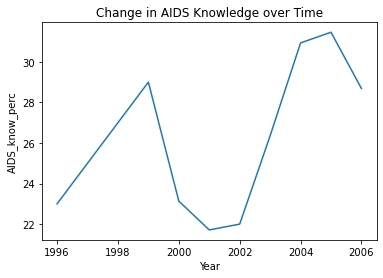

In [59]:
HIV_knowledge_mean = HIV_knowledge.groupby('Year')['AIDS_know_perc'].mean() 
HIV_knowledge_mean.plot(kind = 'line',
                      x='Year',
                      y='AIDS_know_perc')
plt.ylabel("AIDS_know_perc")
plt.title("Change in AIDS Knowledge over Time");

What causes this dip between 1999 and 2004? 

Below: It's probably from a decrease in the number of observations. There actually aren't a lot of data points in this dataset. 

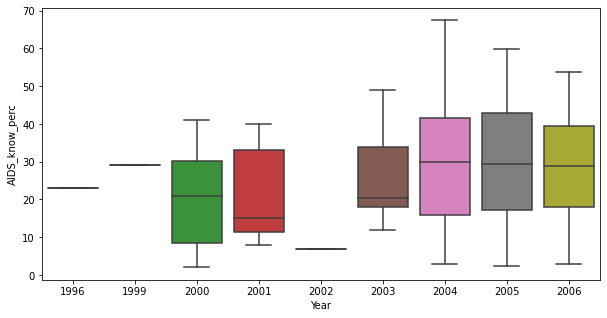

In [83]:
plt.figure(figsize = (10,5))
sns.boxplot(data = gdp_internet_use_HIV_know,
            x = 'Year',
            y = 'AIDS_know_perc');

In [61]:
HIV_knowledge.groupby("Year")["AIDS_know_perc"].mean()

Year
1996    23.000000
1999    29.000000
2000    23.133333
2001    21.714286
2002    22.000000
2003    26.357143
2004    30.933333
2005    31.460000
2006    28.686842
Name: AIDS_know_perc, dtype: float64

In [82]:
HIV_knowledge["Year"].value_counts()

2005    40
2006    38
2000    15
2003    14
2004    12
2001     7
1996     2
2002     2
1999     1
Name: Year, dtype: int64

## Merge with GDP and Internet use data set

In [63]:
gdp_internet_use_HIV_know = pd.merge(left = gdp_and_internet_use,
                 right = HIV_knowledge,
                 on = ('Country','Year'));
gdp_internet_use_HIV_know.head(5)

,Country,Year,Internet_Users_Pct,Continent,GDP_per_Capita,Subgroup,AIDS_know_perc
0,Albania,2005,6.043891,Europe,8066.557445,Female 15-24 yr,5.6
1,Algeria,2006,7.375985,Africa,10527.423643,Female 15-24 yr,13.1
2,Armenia,2005,5.252983,Europe,7419.853768,Female 15-24 yr,22.6
3,Armenia,2005,5.252983,Europe,7419.853768,Male 15-24 yr,15.1
4,Armenia,2000,1.300470,Europe,4048.257817,Male 15-24 yr,8.0


In [73]:
gdp_internet_use_HIV_know["Year"].max()

2006

In [74]:
gdp_internet_use_HIV_know["Year"].min()

1996

In [65]:
gdp_internet_use_HIV_know.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 107 entries, 0 to 106
Data columns (total 7 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Country             107 non-null    object 
 1   Year                107 non-null    int64  
 2   Internet_Users_Pct  107 non-null    float64
 3   Continent           107 non-null    object 
 4   GDP_per_Capita      107 non-null    float64
 5   Subgroup            107 non-null    object 
 6   AIDS_know_perc      107 non-null    float64
dtypes: float64(3), int64(1), object(3)
memory usage: 6.7+ KB


In [66]:
gdp_internet_use_HIV_know.corr()

,Year,Internet_Users_Pct,GDP_per_Capita,AIDS_know_perc
Year,1.000000,0.336054,0.091552,0.182986
Internet_Users_Pct,0.336054,1.000000,0.730689,0.283430
GDP_per_Capita,0.091552,0.730689,1.000000,0.057386
AIDS_know_perc,0.182986,0.283430,0.057386,1.000000


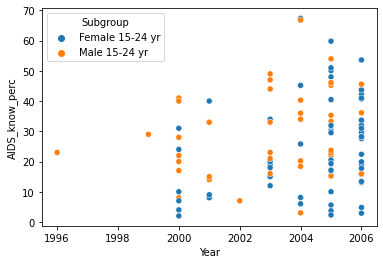

In [64]:
sns.scatterplot(data = gdp_internet_use_HIV_know,
                               x= "Year",
                               y= "AIDS_know_perc",hue = "Subgroup",);
#add subgroup to see if we can pull anything out from differences between male and female. 

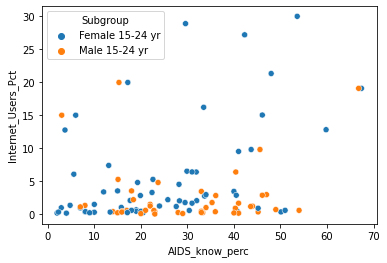

In [67]:
sns.scatterplot(data = gdp_internet_use_HIV_know, y = "Internet_Users_Pct", x = "AIDS_know_perc",hue = "Subgroup");

In [68]:
from ipywidgets import interact, IntSlider

In [86]:
@interact(Year = IntSlider(
    options = ['1996','1999','2000','2001','2002','2003','2004','2005','2006'],
    value = "Year")

HIV_know_Slider = gdp_internet_use_HIV_know.groupby("Year")["Internet_Users_Pct"].plot(kind = "scatter",
                                                                                     x = "AIDS_know_perc",
                                                                                     y = "Internet_Users_Pct",)#try to put a float slider on this for Year

SyntaxError: invalid syntax (<ipython-input-86-e0c3132f3de7>, line 5)

Figure out relationship between high internet users percent and high AIDS knowledge. 


In [ ]:
gdp_and_internet_use.head()

In [ ]:
gdp_internet_use_HIV_know